# Exploratory Data Analysis
Roles to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for UK Data Analyst Roles

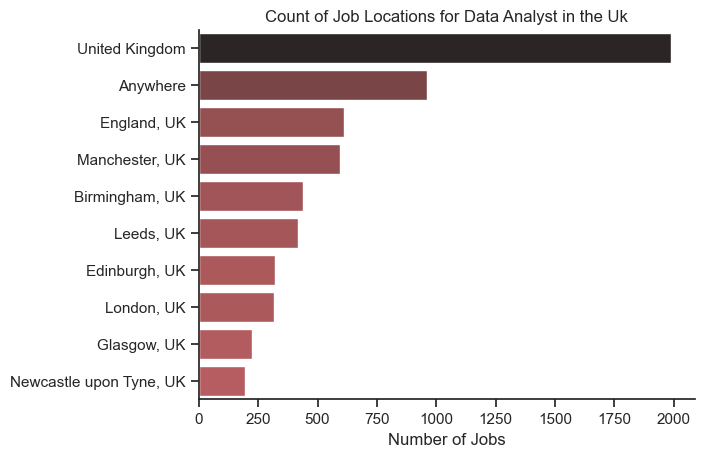

In [4]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')]

df_plot = df_DA_UK['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:r_r', legend=False )

# To remove border around the graph
sns.despine()

plt.title('Count of Job Locations for Data Analyst in the Uk')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


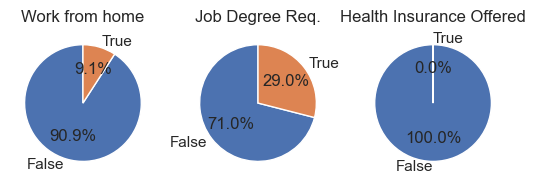

In [10]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_UK[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

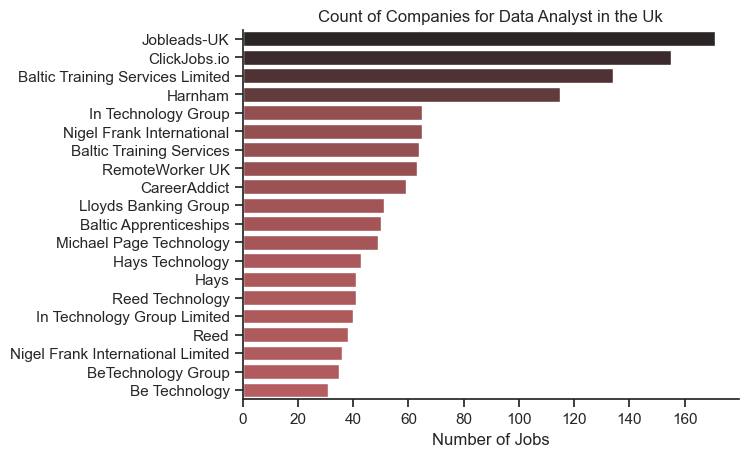

In [13]:
df_plot = df_DA_UK['company_name'].value_counts().head(20).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:r_r', legend=False )

# To remove border around the graph
sns.despine()

plt.title('Count of Companies for Data Analyst in the Uk')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()